**Identify breakpoints, VC-dimensions and growth functions of following hypotheses:**

**a) $h(x) = +1$ if $x_i > a$**

Давайте отсортируем точки на прямой и посмотрим, где может находится $a$ относительно этих точек. Всего $N + 1$ позиция. Значит, функция роста равна $N + 1$. Если $N \ge 2$, то $2^N > N + 1$, при $N = 1$ $2^N = N + 1$, то есть $d_{VC}(h) = 1$, а breakpoint $k = 2$. 

**b) $h(x) = +1$ if $a < x_i < b$**

Всё то же самое, только теперь мы выбираем место для неупорядоченной пары (считаем, что $b > a$, если это не так, или если они попали в один промежуток, то ответ будет $-1$ для всех точек, и это ещё один случай. Число неупорядоченных пар $\frac{(N + 1) N}{2}$, то есть функция роста равна $\frac{(N + 1)N}{2} + 1$. При $N = 2$  $\frac{(N + 1)N}{2} + 1 = 4 = 2^N$. При $N = 3$ $\frac{(N + 1)N}{2} + 1 = 7 < 8 = 2^N$. То $d_{VC}(h) = 2$, а $k = 3$.

**Implement the pocket perceptron algorithm. Train-test split the dataset (80%/20%). Train the algorithm on train points and find the best performing line on test points. Find the best percept Draw dataset points and the resulting line.**


In [158]:
import pandas as pd
blob = pd.read_csv('blobs2.csv')

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.reset_orig()
def show(data, x_plot, y_plot_list):
    facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
    for ax in facet.axes.flat:
        for y_plot in y_plot_list:
            ax.plot(x_plot, y_plot, c=".2")

In [160]:
from sklearn.model_selection import train_test_split

X = blob.drop(['label'], axis=1)
X['1'] = np.ones(len(X))
cols = ['1', 'x', 'y']
X = X[cols]
labels = blob['label'].apply(lambda x : -1 if x <= 0 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)

In [180]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
def check(w, x_i, y_i):
    return np.sign(np.dot(np.transpose(w), x_i)) == y_i

def test(w, X, y):
    guessed = 0
    for i in range(len(X)):
        y_i = y.values[i]
        if check(w, X.iloc[i], y_i):
            guessed += 1
    return guessed

def perceptron(X_train, y_train, X_test, y_test, pocket = False, num_of_iterations=100):
    res = np.array([])
    best = -1
    w = np.array([np.random.random_sample() for _ in range(len(X_train.columns))]) 
    for _ in tqdm(range(num_of_iterations)):
        for i in range(len(X_train)):
            x_i = X_train.iloc[i]
            y_i = y_train.values[i]
            if check(w, x_i, y_i):
                continue
            if pocket:
                guessed = test(w, X_test, y_test)
                if guessed > best:
                    best = guessed
                    res = w.copy()
            w = (w + y_i * x_i).values
    if pocket:
        guessed = test(w, X_test, y_test)
        if guessed < best:
            w = res
    return w

In [145]:
weights = perceptron(X_train, y_train, X_test, y_test, True, 300)

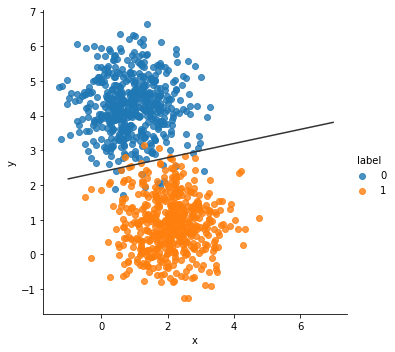

In [146]:
x_plot = np.array([-1.0, 7.0])
y_plot = (-res[1] / res[2]) * x_plot - np.repeat(res[0] / res[2], len(x_plot))
show(blob, x_plot, [y_plot])

**Add second-degree polynomial features to the dataset ($x_1^2, x_2^2, x_1x_2$), find the best perceptron hyperplane. Draw a projection of the hyperplane to the original two-dimensional space. Repeat for third- and fourth-degree polynomial features.**


In [162]:
X1 = X.copy()
X1['x2'] = X['x'] * X['x']
X1['y2'] = X['y'] * X['y']
X1['xy'] = X['x'] * X['y']

In [163]:
weights2 = perceptron(X1, labels, X1, labels, False, 500)

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.reset_orig()
def show_contour(data, X, Y, Z):
    facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
    for ax in facet.axes.flat:
        for y_plot in y_plot_list:
            ax.contour(X, Y, Z, [0])

In [165]:
N = 1000
x_plot = np.linspace(-2, 5, N)
y_plot = np.linspace(-2, 5, N)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)

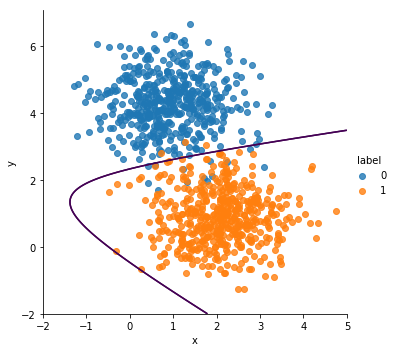

In [166]:
def f2(x, y, w):
    return w[0] + w[1] * x + w[2] * y + w[3] * x ** 2 + w[4] * y ** 2 + w[5] * x * y
Z2 = f2(X_plot, Y_plot, weights2)
show_contour(blob, X_plot, Y_plot, Z2)

In [181]:
X2 = X1.copy()
X2['x3'] = X1['x'] * X1['x2']
X2['y3'] = X1['y'] * X1['y2']
X2['x2y'] = X1['x2'] * X1['y']
X2['xy2'] = X1['x'] * X1['y2']

In [182]:
weights3 = perceptron(X2, labels, X2, labels, True, 300)

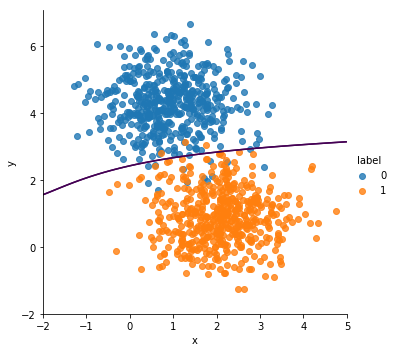

In [183]:
def f3(x, y, w):
    return f2(x, y, w) + w[6] * x ** 3 + w[7] * y ** 3 + w[8] * x ** 2 * y + w[9] * x * y ** 2

Z3 = f3(X_plot, Y_plot, weights3)
show_contour(blob, X_plot, Y_plot, Z3)

In [140]:
X3 = X2.copy()
X3['x4'] = X2['x3'] * X2['x']
X3['y4'] = X2['y3'] * X2['y']
X3['x3y'] = X2['x3'] * X2['y']
X3['xy3'] = X2['x'] * X2['y3']
X3['x2y2'] = X2['x2'] * X2['y2']

In [153]:
weights4 = perceptron(X3, labels, X3, labels, True, 500)

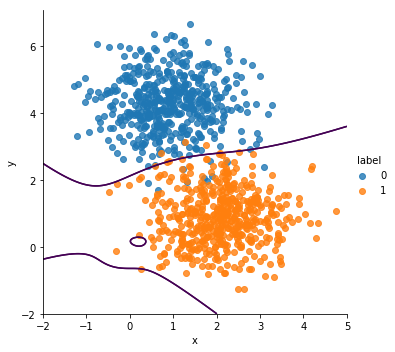

In [154]:
def f4(x, y, w):
    return f3(x, y, w) + (w[10] * x ** 4 + w[11] * y ** 4 +
                  w[12] * x ** 3 * y + w[13] * x * y ** 3 +
                  w[14] * x ** 2 * y ** 2)

Z4 = f4(X_plot, Y_plot, weights4)
show_contour(blob, X_plot, Y_plot, Z4)

**Implement the logistic regression algorithm. Train it via the stochastic gradient descent and output draw the accuracy/iteration curve.**

In [168]:
import pandas as pd

cancer = pd.read_csv('cancer.csv')
spam = pd.read_csv('spam.csv')

In [169]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X_spam = spam.drop(['label'], axis=1)
y_spam = spam['label'].apply(lambda x : 1 if x == 1 else -1)

X_spam = pd.DataFrame(MinMaxScaler().fit_transform(X_spam))
X_spam['c'] = np.ones(len(X_spam))
X_spam_test, X_spam_train, y_spam_test, y_spam_train = train_test_split(X_spam, y_spam)

c:\users\olga\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [170]:
from sklearn.model_selection import train_test_split
X_cancer = cancer.drop(['label'], axis=1)
y_cancer = cancer['label'].apply(lambda x : 1 if x == 'M' else -1)

X_cancer = pd.DataFrame(MinMaxScaler().fit_transform(X_cancer))
X_cancer['c'] = np.ones(len(X_cancer))
X_cancer_test, X_cancer_train, y_cancer_test, y_cancer_train = train_test_split(X_cancer, y_cancer)

In [171]:
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import accuracy_score
import numpy as np

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def predict(X_test, w):
    y_pred = []
    for i in range(len(X_test)):
        res = 1 if sigmoid(np.dot(np.transpose(w), X_test[i])) >= 0.5 else -1
        y_pred.append(res)
    return np.array(y_pred)

def h(w, x, y):
    return 1 + np.exp(y * np.dot(np.transpose(w), x))

def logistic_regression_train(X_train, y_train, X_test, y_test, epoch=70, alpha=0.1, batch_size=40):
    rows, columns = X_train.shape
    w = np.random.rand(columns)
    batches_idx = np.array_split(np.arange(rows), rows / batch_size)
    train_acc = []
    test_acc = []
    for _ in tqdm(range(epoch)):
        for batch_idx in batches_idx:
            grad = np.zeros(columns)
            for i in batch_idx:
                grad += y_train[i] * X_train[i] / h(w, X_train[i], y_train[i])
            w += alpha / len(batch_idx) * grad
            train_accuracy = accuracy_score(y_train, predict(X_train, w))
            test_accuracy = accuracy_score(y_test, predict(X_test, w))
            train_acc.append(train_accuracy)
            test_acc.append(test_accuracy)
    return w, train_acc, test_acc

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw_acc(train, test):
    plt.plot(range(len(train)), train, label='train')
    plt.plot(range(len(test)), test, label='test')
    plt.legend()

In [173]:
w, train_acc, test_acc = logistic_regression_train(X_spam_train.values, y_spam_train.values,
                                                   X_spam_test.values, y_spam_test.values)

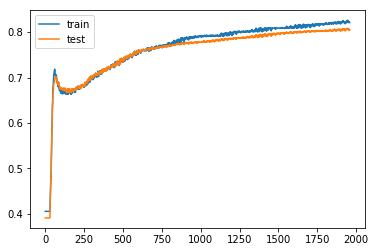

In [174]:
draw_acc(train_acc, test_acc)

In [175]:
w, train, test = logistic_regression_train(X_cancer_train.values, y_cancer_train.values,
                                   X_cancer_test.values, y_cancer_test.values)

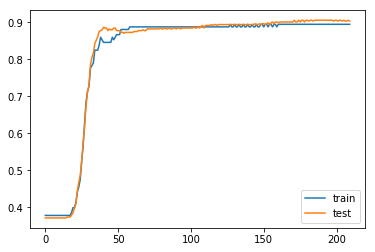

In [176]:
draw_acc(train, test)